#Final Project:



In [276]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
# Load the dataset
file_path = 'StudentPerformanceFactors.csv'
dataset = pd.read_csv(file_path)
cat_variables=[]

for column in dataset.select_dtypes(include='object').columns:
    cat_variables.append(column)
num_variables=dataset.columns.difference(cat_variables)
num_variables_n=num_variables.drop("Exam_Score")
#duplicate rows ro get 8000 samples
extra=dataset.sample(n=2018)
dataset=pd.concat([dataset,extra])
# Separate features and target
X = dataset.drop('Exam_Score', axis=1)
y = dataset['Exam_Score']

In [277]:
X.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
count,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000,8625.000000
mean,19.954435,79.920696,7.029797,75.089159,1.493797,2.968232
std,6.023696,11.516040,1.469201,14.386424,1.230880,1.031693
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000


In [278]:
# Split the resampled dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1971)

# Print the shapes of the resulting sets
print("\nShapes of the resulting sets:")
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)


Shapes of the resulting sets:
X_train: (6037, 19)
X_test: (2588, 19)
y_train: (6037,)
y_test: (2588,)


In [233]:
X_train.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
count,6037.000000,6037.000000,6037.000000,6037.000000,6037.000000,6037.000000
mean,19.999006,79.978135,7.038264,75.060792,1.503561,2.967534
std,5.982994,11.595693,1.471744,14.409636,1.231031,1.040884
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000


In [234]:
X_train

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender
1874,28,93,Low,High,Yes,6,90,Medium,Yes,1,Low,Medium,Public,Positive,2,Yes,High School,Near,Female
4272,12,87,High,High,Yes,9,75,Medium,No,1,Low,Medium,Private,Neutral,3,Yes,College,Moderate,Female
711,19,92,Medium,Medium,Yes,5,85,Medium,Yes,1,Medium,High,Private,Neutral,4,No,High School,Near,Male
1033,24,76,Low,High,No,9,75,Low,Yes,0,Low,Medium,Private,Positive,5,No,High School,Near,Male
505,17,66,High,High,No,5,64,Low,Yes,0,Medium,High,Private,Neutral,2,No,College,Near,Male
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1033,24,76,Low,High,No,9,75,Low,Yes,0,Low,Medium,Private,Positive,5,No,High School,Near,Male
6218,18,81,Low,Medium,No,9,73,Medium,Yes,1,High,Medium,Public,Negative,2,No,High School,Near,Male
3475,12,65,Medium,High,Yes,5,75,High,Yes,0,High,Medium,Private,Negative,2,No,High School,Moderate,Male
948,20,72,Medium,High,Yes,7,56,Low,Yes,0,Low,Medium,Public,Negative,6,Yes,College,Moderate,Male


In [235]:
y_train

,Exam_Score
1874,71
4272,65
711,70
1033,66
505,64
...,...
1033,66
6218,65
3475,62
948,63


In [236]:
# clean null values
for col in X_train.columns:
    X_train[col] = X_train[col].replace('nan', np.nan)
    X_train[col] = X_train[col].fillna(X_train[col].mode()[0])

# Exploratory Data Analysis

In [237]:
y_train.info()

<class 'pandas.core.series.Series'>
Index: 6037 entries, 1874 to 5107
Series name: Exam_Score
Non-Null Count  Dtype
--------------  -----
6037 non-null   int64
dtypes: int64(1)
memory usage: 94.3 KB


In [238]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Index: 6037 entries, 1874 to 5107
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6037 non-null   int64 
 1   Attendance                  6037 non-null   int64 
 2   Parental_Involvement        6037 non-null   object
 3   Access_to_Resources         6037 non-null   object
 4   Extracurricular_Activities  6037 non-null   object
 5   Sleep_Hours                 6037 non-null   int64 
 6   Previous_Scores             6037 non-null   int64 
 7   Motivation_Level            6037 non-null   object
 8   Internet_Access             6037 non-null   object
 9   Tutoring_Sessions           6037 non-null   int64 
 10  Family_Income               6037 non-null   object
 11  Teacher_Quality             6037 non-null   object
 12  School_Type                 6037 non-null   object
 13  Peer_Influence              6037 non-null   object

In [239]:
X_train.describe()

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Tutoring_Sessions,Physical_Activity
count,6037.000000,6037.000000,6037.000000,6037.000000,6037.000000,6037.000000
mean,19.999006,79.978135,7.038264,75.060792,1.503561,2.967534
std,5.982994,11.595693,1.471744,14.409636,1.231031,1.040884
min,1.000000,60.000000,4.000000,50.000000,0.000000,0.000000
25%,16.000000,70.000000,6.000000,63.000000,1.000000,2.000000
50%,20.000000,80.000000,7.000000,75.000000,1.000000,3.000000
75%,24.000000,90.000000,8.000000,88.000000,2.000000,4.000000
max,44.000000,100.000000,10.000000,100.000000,8.000000,6.000000


In [240]:
#verify no null values left
print(X_train.isnull() .sum())

Hours_Studied                 0
Attendance                    0
Parental_Involvement          0
Access_to_Resources           0
Extracurricular_Activities    0
Sleep_Hours                   0
Previous_Scores               0
Motivation_Level              0
Internet_Access               0
Tutoring_Sessions             0
Family_Income                 0
Teacher_Quality               0
School_Type                   0
Peer_Influence                0
Physical_Activity             0
Learning_Disabilities         0
Parental_Education_Level      0
Distance_from_Home            0
Gender                        0
dtype: int64


<Axes: xlabel='Exam_Score', ylabel='Count'>

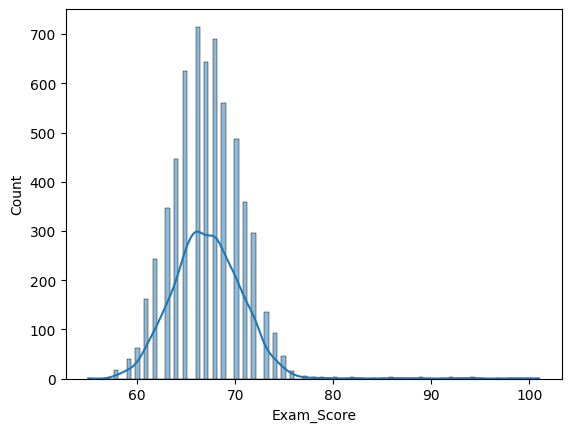

In [241]:
#distribution of exam scores
sns.histplot(y_train,kde=True)

<ipython-input-242-2a2f97828a1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(X_train[column],palette="viridis")


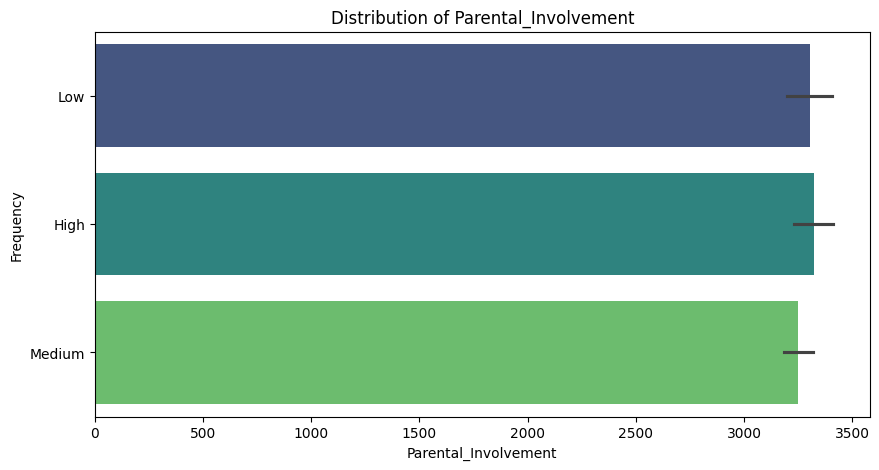

<ipython-input-242-2a2f97828a1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(X_train[column],palette="viridis")


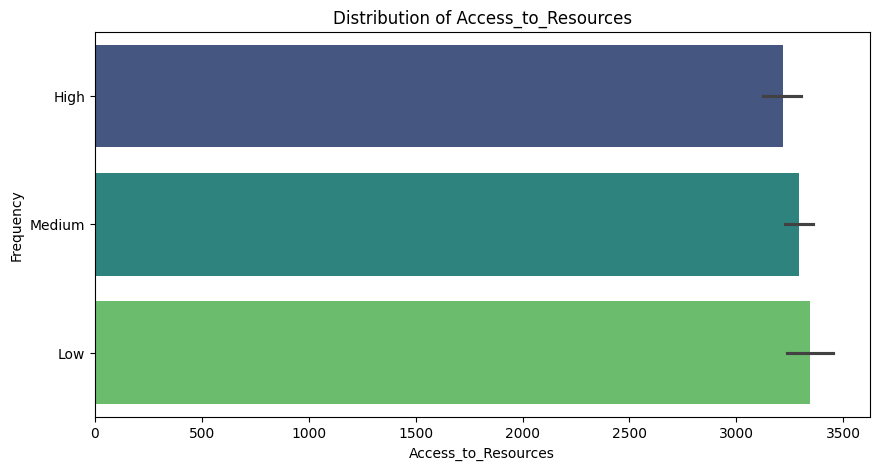

<ipython-input-242-2a2f97828a1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(X_train[column],palette="viridis")


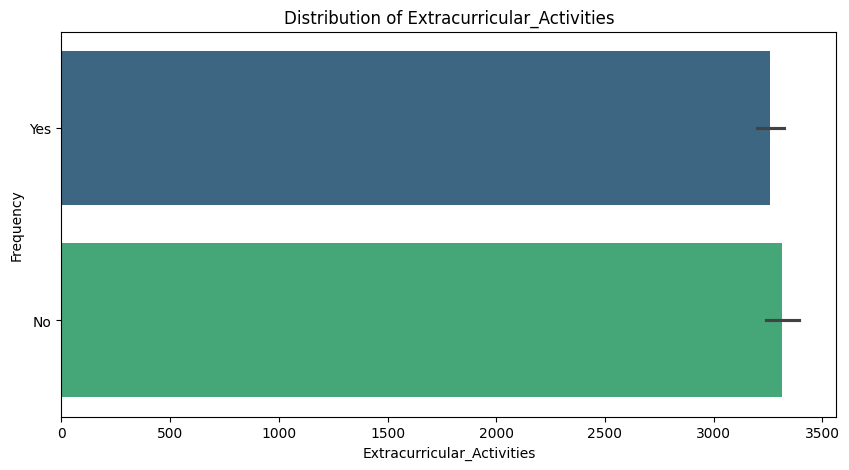

<ipython-input-242-2a2f97828a1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(X_train[column],palette="viridis")


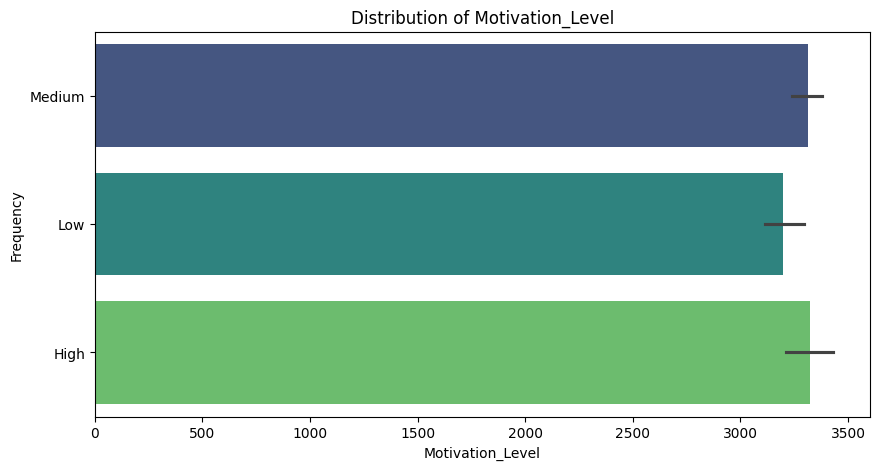

<ipython-input-242-2a2f97828a1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(X_train[column],palette="viridis")


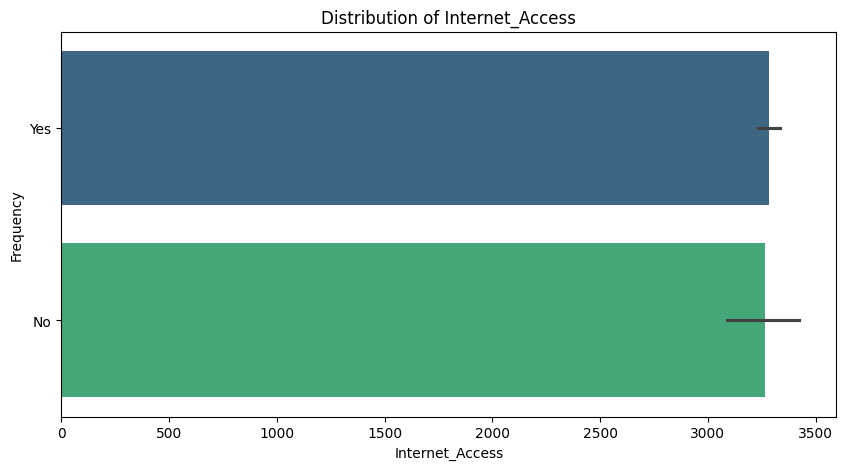

<ipython-input-242-2a2f97828a1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(X_train[column],palette="viridis")


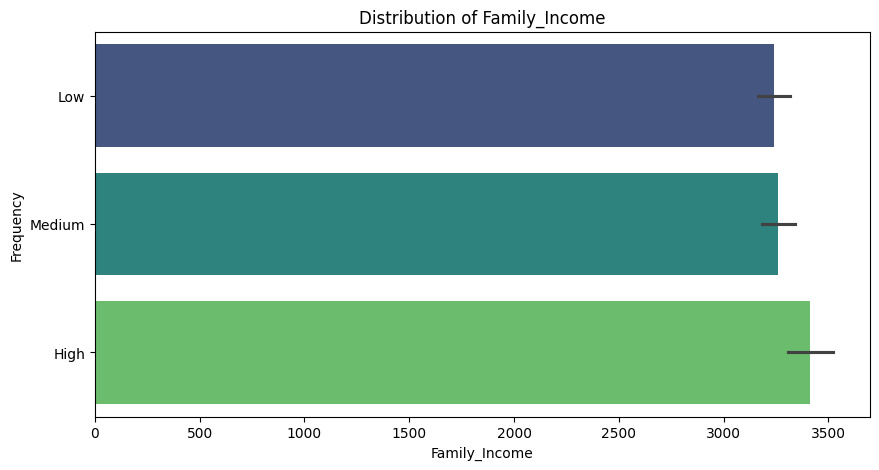

<ipython-input-242-2a2f97828a1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(X_train[column],palette="viridis")


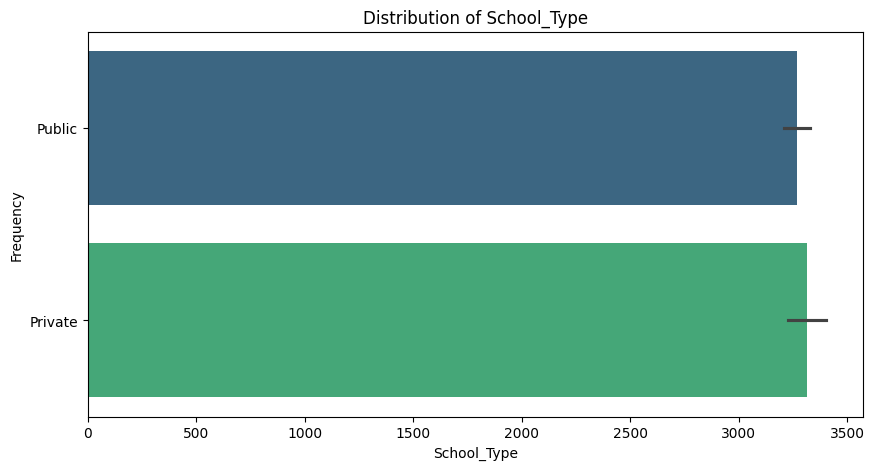

<ipython-input-242-2a2f97828a1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(X_train[column],palette="viridis")


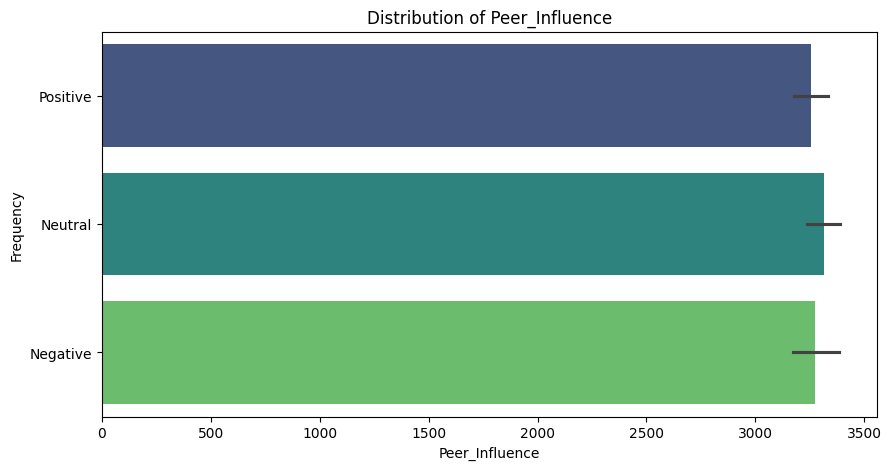

<ipython-input-242-2a2f97828a1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(X_train[column],palette="viridis")


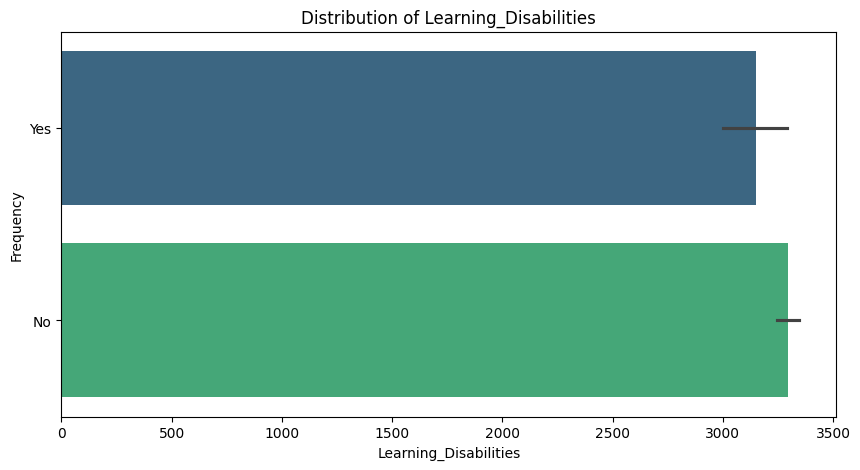

<ipython-input-242-2a2f97828a1d>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(X_train[column],palette="viridis")


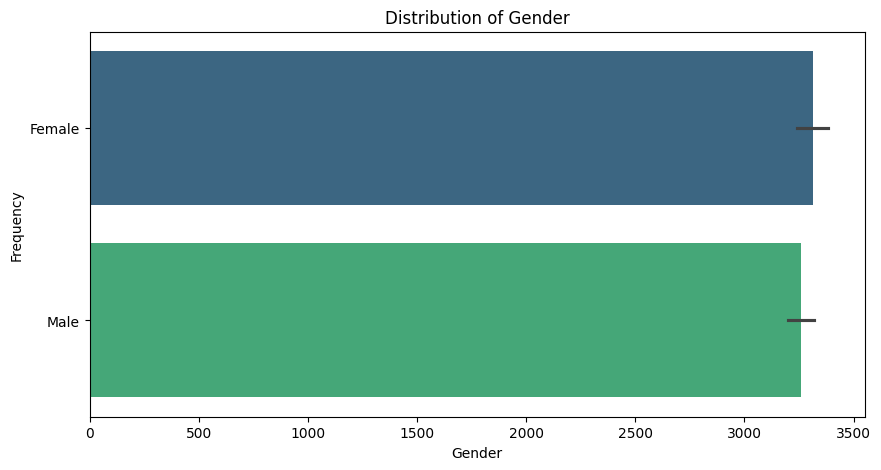

In [242]:
#bar charts for some categorical variables
cat_variables_pie=['Teacher_Quality','Parental_Education_Level','Distance_from_Home']
for x in cat_variables_pie:
  cat_variables.remove(x)
cat_variables_bar=cat_variables
for column in cat_variables_bar:
    plt.figure(figsize=(10, 5))
    sns.barplot(X_train[column],palette="viridis")
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

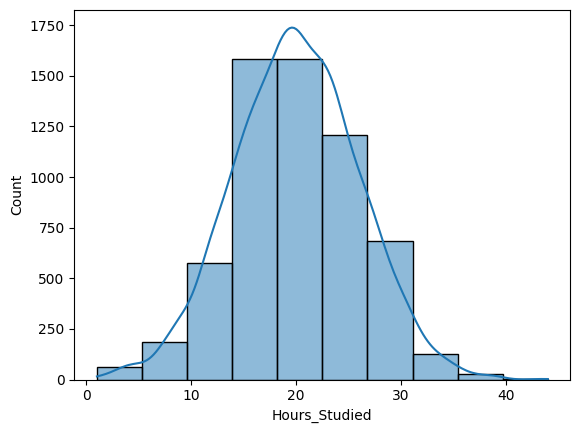

In [243]:
sns.histplot(data = X_train, x = "Hours_Studied",kde=True,bins=10)
plt.show()

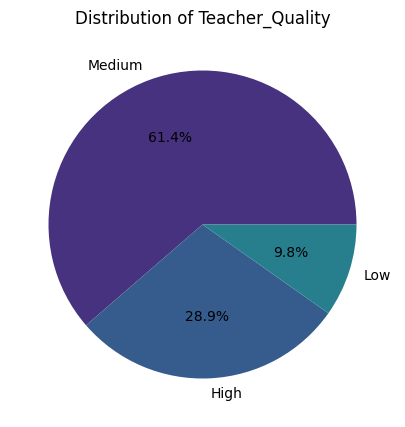

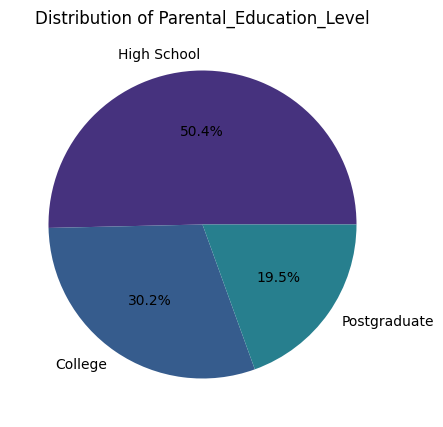

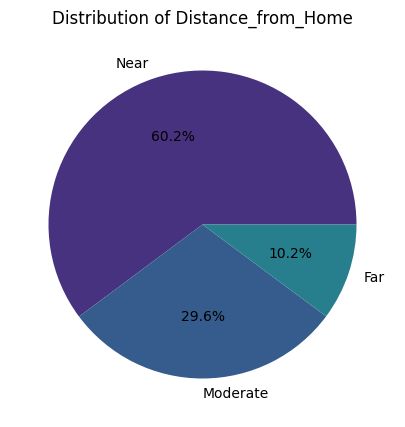

In [244]:
#pie charts for the rest of the categorical variables
for column in cat_variables_pie:
    plt.figure(figsize=(10, 5))
    X_train[column].value_counts().plot.pie(autopct='%1.1f%%', colors=sns.color_palette('viridis'))
    plt.title(f'Distribution of {column}')
    plt.ylabel('')  # Remove the y-axis label
    plt.show()

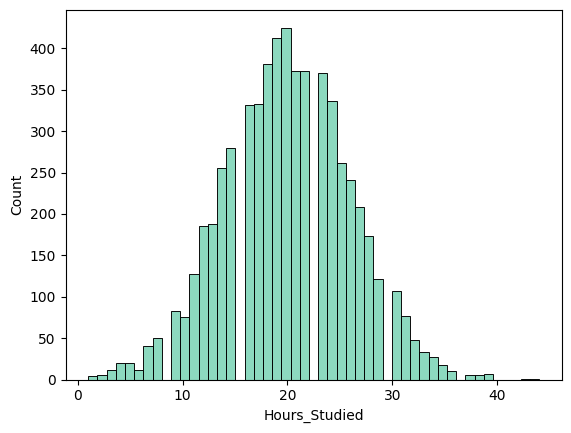

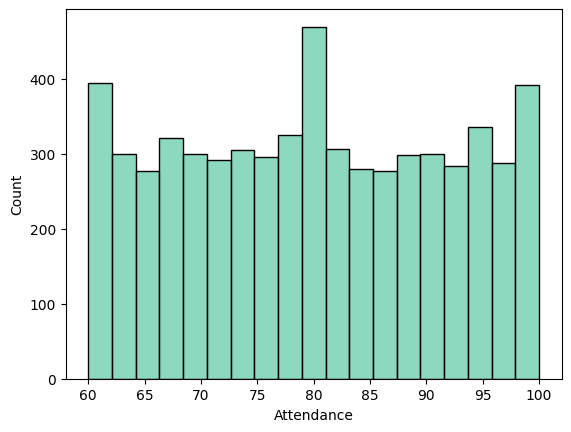

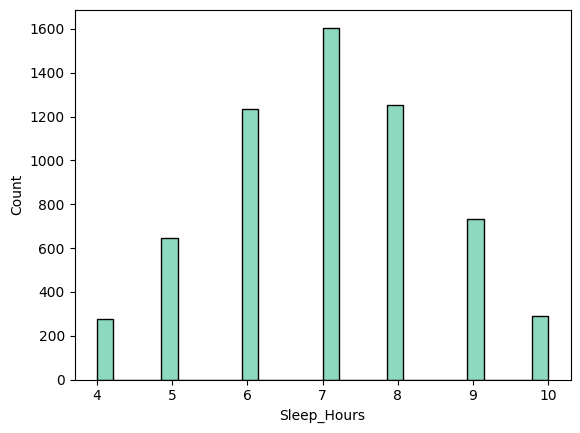

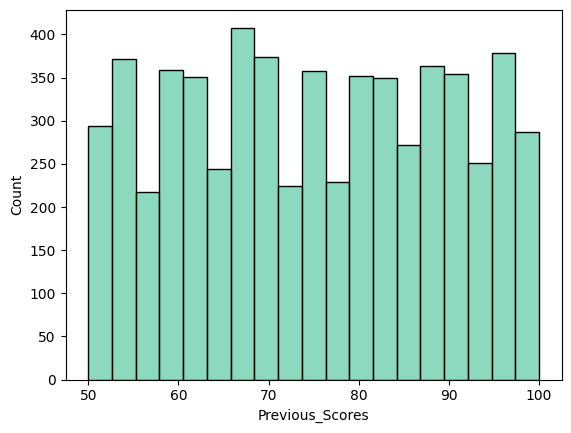

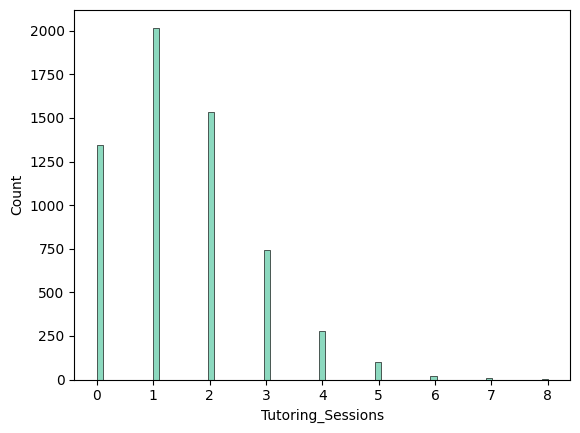

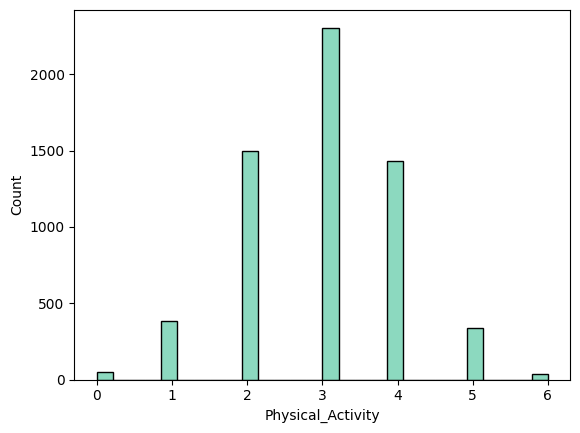

In [245]:
#histograms for numerical data
for col_type in X_train.select_dtypes(include = "number").columns:
    sns.histplot(data = X_train, x = col_type,color="mediumaquamarine")
    plt.show()

In [246]:
import scipy.stats as stats

X_tests=X_train.join(y_train)
# Group data by gender and
grouped_data_gender = X_tests.groupby(['Gender'])['Exam_Score']

# Perform t-tests for means

# using t-test for two genders
group1_scores = grouped_data_gender.get_group(('Female',))
group2_scores = grouped_data_gender.get_group(('Male',))
t_statistic, p_value = stats.ttest_ind(group1_scores, group2_scores)
print(f"T-test Results (Example Groups): t-statistic={t_statistic}, p-value={p_value}")

# Group data by  motivation level
grouped_data_motivation = X_tests.groupby(['Motivation_Level'])['Exam_Score']
# Levene test for variances
# For two specific motivation levels
levene_statistic, levene_p_value = stats.levene(group1_scores, group2_scores)
print(f"Levene Test for equal variance (Example Groups): W={levene_statistic}, p-value={levene_p_value}")

# Same for motivation level
# t-test for two specific motivation levels high and low
group1_scores = grouped_data_motivation.get_group(('High',))  # Example group
group2_scores = grouped_data_motivation.get_group(('Low',))  # Example group
t_statistic, p_value = stats.ttest_ind(group1_scores, group2_scores)
print(f"T-test Results (Example Groups): t-statistic={t_statistic}, p-value={p_value}")

levene_statistic, levene_p_value = stats.levene(group1_scores, group2_scores)
print(f"Levene Test for equal variance (Example Groups): W={levene_statistic}, p-value={levene_p_value}")



T-test Results (Example Groups): t-statistic=0.41847020558768894, p-value=0.6756145473923563
Levene Test for equal variance (Example Groups): W=4.6449023080184615, p-value=0.031175513991155913
T-test Results (Example Groups): t-statistic=10.172087669919915, p-value=5.223000336270153e-24
Levene Test for equal variance (Example Groups): W=1.1833547522397874, p-value=0.2767407316274907


### Linear Regression

In [247]:
#correlation matrix and heatmap to visualize
correlation_matrix=X_train[num_variables_n].corr()

<Axes: >

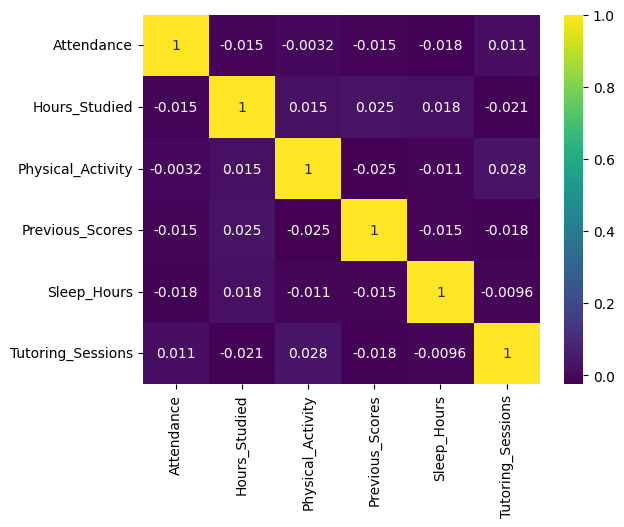

In [248]:
sns.heatmap(correlation_matrix,annot=True,cmap="viridis")

## Regression

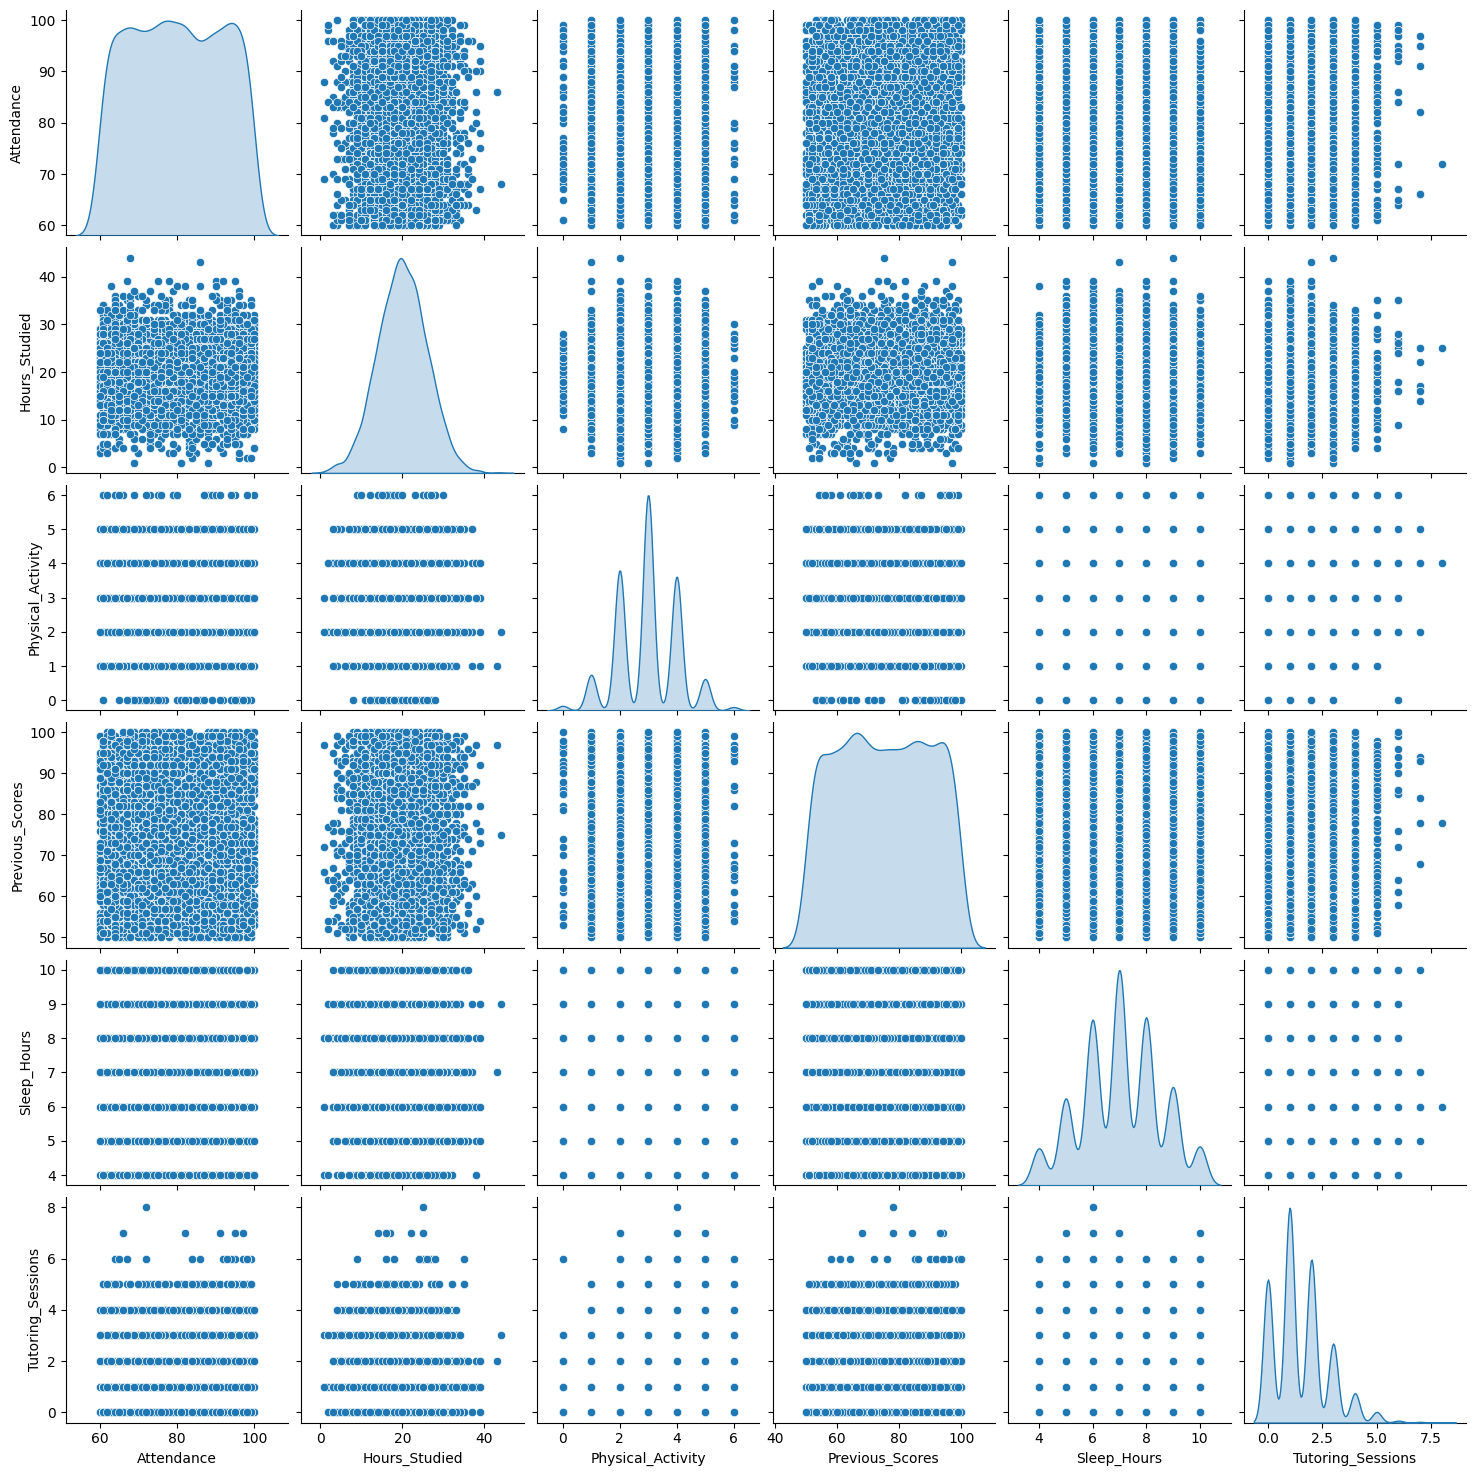

In [249]:
#pairwise plots for all numerical variables

sns.pairplot(X_train[num_variables_n], diag_kind='kde')
plt.show()

In [279]:
import statsmodels.api as sm
#linear regression using best predictors found on minitab
X = X_train[["Hours_Studied", "Attendance", "Previous_Scores", "Tutoring_Sessions"]]
y = y_train

# Add a constant to the model (intercept)
X = sm.add_constant(X)
model = sm.OLS(y, X).fit()

# Display model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:             Exam_Score   R-squared:                       0.592
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     2187.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:18:36   Log-Likelihood:                -14052.
No. Observations:                6037   AIC:                         2.811e+04
Df Residuals:                    6032   BIC:                         2.815e+04
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                41.2910      0.30

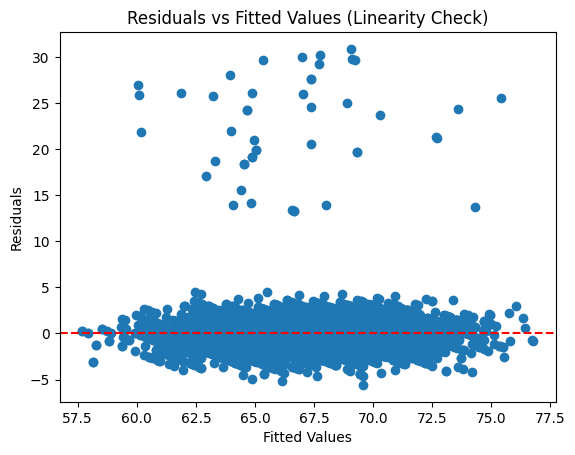

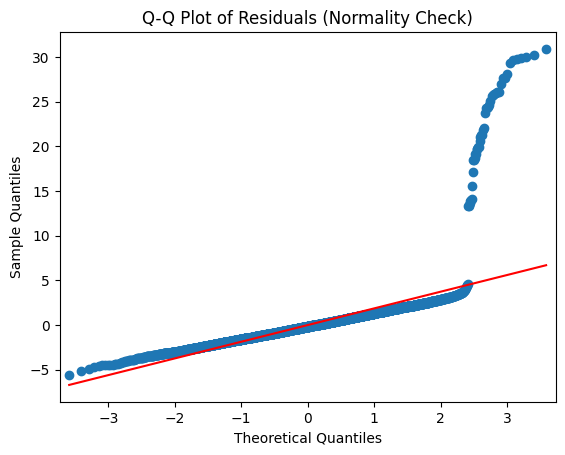

In [280]:
#residual plots
residuals = model.resid
fitted_values = model.fittedvalues

#Linearity
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Linearity Check)")
plt.show()

#Test for Normality of residuals
# Create the QQ plot
fig = sm.qqplot(residuals, line='r')

plt.title("Q-Q Plot of Residuals (Normality Check)")
plt.show()




In [281]:
from scipy.stats import boxcox

# Set up lambda values
lambdas = [-2, -1, 0, 0.25, 0.5, 1, 2]
r_squared_values = []

# Prepare predictors (independent variables)
X = X_train[["Hours_Studied", "Attendance", "Previous_Scores", "Tutoring_Sessions"]]
X = sm.add_constant(X)  # Add constant for intercept using sm.add_constant

# Loop through each lambda value
for lmbda in lambdas:
    if lmbda == 0:
        # Log transformation for lambda = 0
        y_transformed = np.log(y_train)
    else:
        # Box-Cox transformation for other lambda values
        y_transformed = boxcox(y_train, lmbda=lmbda)

    # Fit the regression model with transformed y
    model_transformed = sm.OLS(y_transformed, X).fit()

    # Store lambda and corresponding R-squared value
    r_squared_values.append((lmbda, model_transformed.rsquared))

# Convert results to DataFrame
r_squared_df = pd.DataFrame(r_squared_values, columns=["Lambda", "R-squared"])
print(r_squared_df)

   Lambda  R-squared
0   -2.00   0.694605
1   -1.00   0.670660
2    0.00   0.636869
3    0.25   0.626714
4    0.50   0.615840
5    1.00   0.591885
6    2.00   0.535087


In [282]:
best_lambda = -2
print(f"Best Lambda Value: {best_lambda}")

# Apply the best lambda transformation
y_transformed = boxcox(y_train, lmbda=best_lambda)

# Fit the regression model with the transformed y
model_transformed = sm.OLS(y_transformed, X).fit()

# Display model summary for the transformed data
print(model_transformed.summary())

Best Lambda Value: -2
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.695
Model:                            OLS   Adj. R-squared:                  0.694
Method:                 Least Squares   F-statistic:                     3430.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:18:43   Log-Likelihood:                 63401.
No. Observations:                6037   AIC:                        -1.268e+05
Df Residuals:                    6032   BIC:                        -1.268e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const           

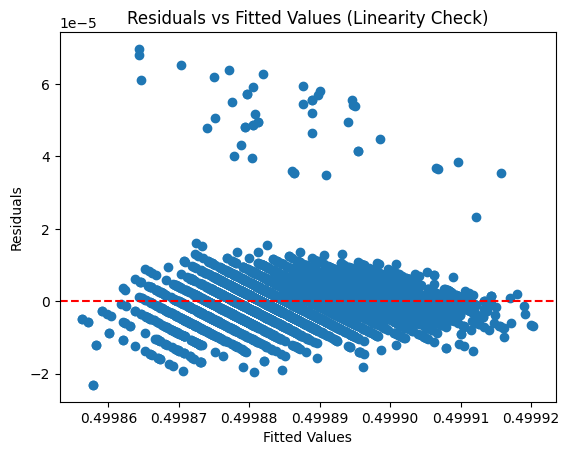

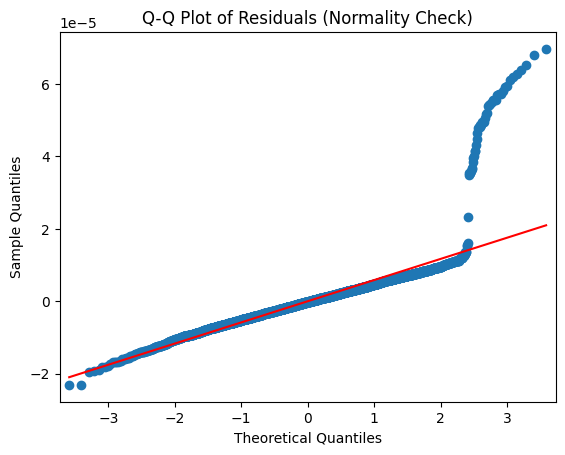

In [283]:
#new residual plots after boxcox transformation
residuals = model_transformed.resid
fitted_values = model_transformed.fittedvalues

#Linearity
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Linearity Check)")
plt.show()

#Test for Normality of residuals
# Create the QQ plot
fig = sm.qqplot(residuals, line='r')

plt.title("Q-Q Plot of Residuals (Normality Check)")
plt.show()

In [284]:
#remove residuals
X_train=X_train.reset_index(drop=True)
y_train=y_train.reset_index(drop=True)
new_data=X_train.join(y_train)

new_data["residuals"]=model_transformed.resid.values

In [285]:
new_data=new_data[np.abs(new_data["residuals"])<0.00002]

In [287]:
#make new training data without residuals
X_train_no_resid=new_data.drop(["Exam_Score","residuals"],axis=1)
y_train_no_resid=new_data["Exam_Score"]
y_transformed_no_resid = boxcox(y_train_no_resid, lmbda=best_lambda)

In [288]:
X = X_train_no_resid[["Hours_Studied", "Attendance", "Previous_Scores", "Tutoring_Sessions"]]
X = sm.add_constant(X)  # Add constant for intercept using sm.add_constant

In [289]:
# Fit the new regression model with the transformed y and no residuals
model_transformed_no_resid = sm.OLS(y_transformed_no_resid, X).fit()

# Display model summary for the transformed data
print(model_transformed_no_resid.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.810
Model:                            OLS   Adj. R-squared:                  0.810
Method:                 Least Squares   F-statistic:                     6382.
Date:                Sat, 07 Dec 2024   Prob (F-statistic):               0.00
Time:                        21:19:07   Log-Likelihood:                 64714.
No. Observations:                5988   AIC:                        -1.294e+05
Df Residuals:                    5983   BIC:                        -1.294e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 0.4998   6.01e-0

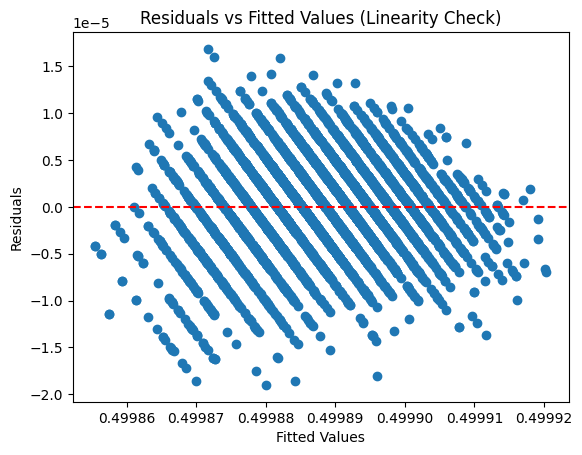

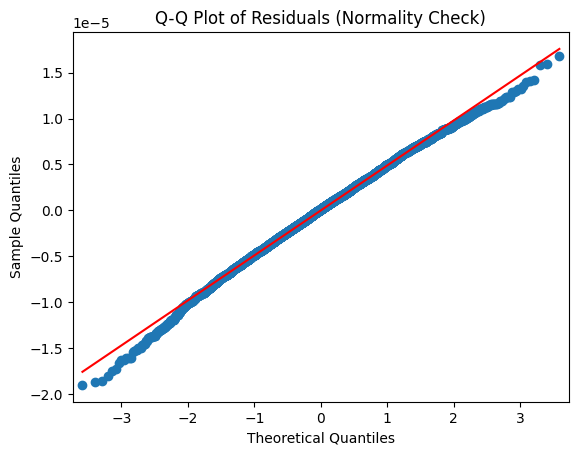

In [290]:
#final residual plots
residuals = model_transformed_no_resid.resid
fitted_values = model_transformed_no_resid.fittedvalues

#Linearity
plt.scatter(fitted_values, residuals)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Fitted Values (Linearity Check)")
plt.show()

#Test for Normality of residuals
# Create the QQ plot
fig = sm.qqplot(residuals, line='r')

plt.title("Q-Q Plot of Residuals (Normality Check)")
plt.show()

Text(0.5, 0, 'Actual Exam Score')

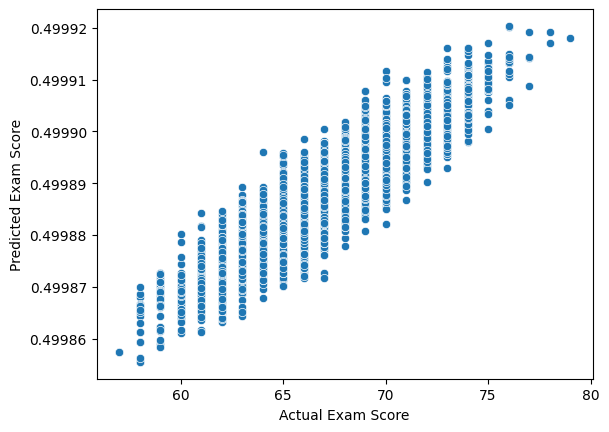

In [291]:
#linearity
sns.scatterplot(x=y_train, y=model_transformed_no_resid.predict(X))
plt.ylabel('Predicted Exam Score')
plt.xlabel('Actual Exam Score')

In [292]:
#Testing model on testing data
#remove  unneccessary predictors
X_test_new=X_test[["Hours_Studied", "Attendance", "Previous_Scores", "Tutoring_Sessions"]]
X_test_new=sm.add_constant(X_test_new)
y_pred=model_transformed_no_resid.predict(X_test_new)


In [293]:
from sklearn.metrics import mean_squared_error, r2_score
from scipy.special import inv_boxcox
# Inverse Box-Cox transformation for predicted y

y_pred_original = inv_boxcox(y_pred + 1e-12, -2)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred_original)
r2 = r2_score(y_test, y_pred_original)

print(f"Mean Squared Error (MSE): {mse}")
print(f"R-squared (R2): {r2}")

Mean Squared Error (MSE): 6.126542104987426
R-squared (R2): 0.5943414329579508


Text(0.5, 0, 'Actual Exam Score')

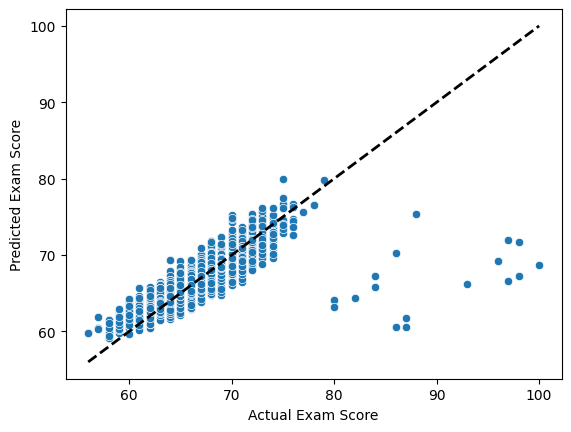

In [264]:
#plot predicted values against actual test values
sns.scatterplot(x=y_test, y=y_pred_original)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.ylabel('Predicted Exam Score')
plt.xlabel('Actual Exam Score')

In [273]:
#Logistic Regression
dataset = pd.read_csv(file_path)
cat_variables=[]

for column in dataset.select_dtypes(include='object').columns:
    cat_variables.append(column)
num_variables=dataset.columns.difference(cat_variables)
#duplicate rows ro get 8000 samples
extra=dataset.sample(n=2018)
dataset=pd.concat([dataset,extra])
# Separate features and target
X = dataset.drop('Motivation_Level', axis=1)
y = dataset['Motivation_Level']
#get training and testign data using same random seed
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1971)

y_train[y_train=="Medium"]="High"
y_test[y_test=="Medium"]="High"
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# Prepare data
# Select numerical and categorical features, drop insignificant ones according to
# p-values from minitab
num_variables=num_variables.drop("Sleep_Hours")
numerical_features = num_variables
for item in ['Motivation_Level', "School_Type", "Gender"]:
    if item in cat_variables:
        cat_variables.remove(item)
categorical_features=cat_variables

In [274]:
#1. Scale numerical features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features]) #Use the same scaler fitted to the training data to tranform the test data.



In [275]:

# 2. One-hot encode categorical features
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
# sparse=False for compatibility with LogisticRegression, handle_unknown='ignore' for unseen categories in the test data
X_train_encoded = encoder.fit_transform(X_train[categorical_features])
X_test_encoded = encoder.transform(X_test[categorical_features])

# 3. Combine features
X_train_final = np.concatenate([X_train_scaled, X_train_encoded], axis=1)
X_test_final = np.concatenate([X_test_scaled, X_test_encoded], axis=1)

# 4. Create and train the model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_final, y_train)

# 5. Make predictions for training data
y_train_pred = model.predict(X_train_final)

# 6. Evaluate
accuracy = accuracy_score(y_train, y_train_pred)
classification_rep = classification_report(y_train, y_train_pred)

print(f"Accuracy for training: {accuracy}")
print(f"Classification Report for training:\n{classification_rep}")


# 5. Make predictions for testing data
y_test_pred = model.predict(X_test_final)

# 6. Evaluate
accuracy = accuracy_score(y_test, y_test_pred)
classification_rep = classification_report(y_test, y_test_pred)

print(f"Accuracy for testing: {accuracy}")
print(f"Classification Report for testing:\n{classification_rep}")

Accuracy for training: 0.81795593837999
Classification Report for training:
              precision    recall  f1-score   support

        High       0.80      0.98      0.88      4249
         Low       0.90      0.43      0.58      1788

    accuracy                           0.82      6037
   macro avg       0.85      0.71      0.73      6037
weighted avg       0.83      0.82      0.79      6037

Accuracy for testing: 0.8245749613601236
Classification Report for testing:
              precision    recall  f1-score   support

        High       0.81      0.98      0.89      1848
         Low       0.91      0.43      0.58       740

    accuracy                           0.82      2588
   macro avg       0.86      0.71      0.74      2588
weighted avg       0.84      0.82      0.80      2588

